In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, integrate
import seaborn as sns

In [2]:
path_1 = os.path.join("C:\Projects", "huboo", "data", "top_down_pick_and_pack_detection.csv.txt")
data = pd.read_csv(path_1)

path_2 = os.path.join("C:\Projects", "huboo", "data", "associations_top_down_pick_and_pack.csv.txt")
tracklets = pd.read_csv(path_2)

In [3]:
#Manually fix ReId errors
#Man = 1, woman = 2
#21 -> 2

tracklets[" person_id"][7] = 2

In [6]:
identity = pd.merge(data, tracklets, on='tracklet_id', how='left')

person_1 = identity[identity[" person_id"] == 1.0]
person_1 = person_1.reset_index()

person_2 = identity[identity[" person_id"] == 2.0]
person_2 = person_2.reset_index()

In [10]:
#Truncate data, clips ends off ~1200 each end, the time it took to reach the top of the forklift.
TRUNC = 1200
person_1 = person_1.truncate(before=TRUNC, after=len(person_1)-TRUNC).reset_index()
person_2 = person_2.truncate(before=TRUNC, after=len(person_2)-TRUNC).reset_index()

In [11]:
#Position
#Position given by the middle bottom of the box. 
#position = (left, top) + 0.5 * (width, height)

person_1["position"] = np.array(zip(person_1["l"] + person_1["w"] / 2, person_1["t"] + person_1["h"] / 2))
person_1["x"] = person_1["l"] + person_1["w"] / 2
person_1["y"] = person_1["t"] + person_1["h"] / 2

person_2["position"] = np.array(zip(person_2["l"] + person_2["w"] / 2, person_2["t"] + person_2["h"] / 2))    #Can add: [1]*len(person_1), if want to transform.
person_2["x"] = person_2["l"] + person_2["w"] / 2
person_2["y"] = person_2["t"] + person_2["h"] / 2

Text(0, 0.5, 'Camera pixels')

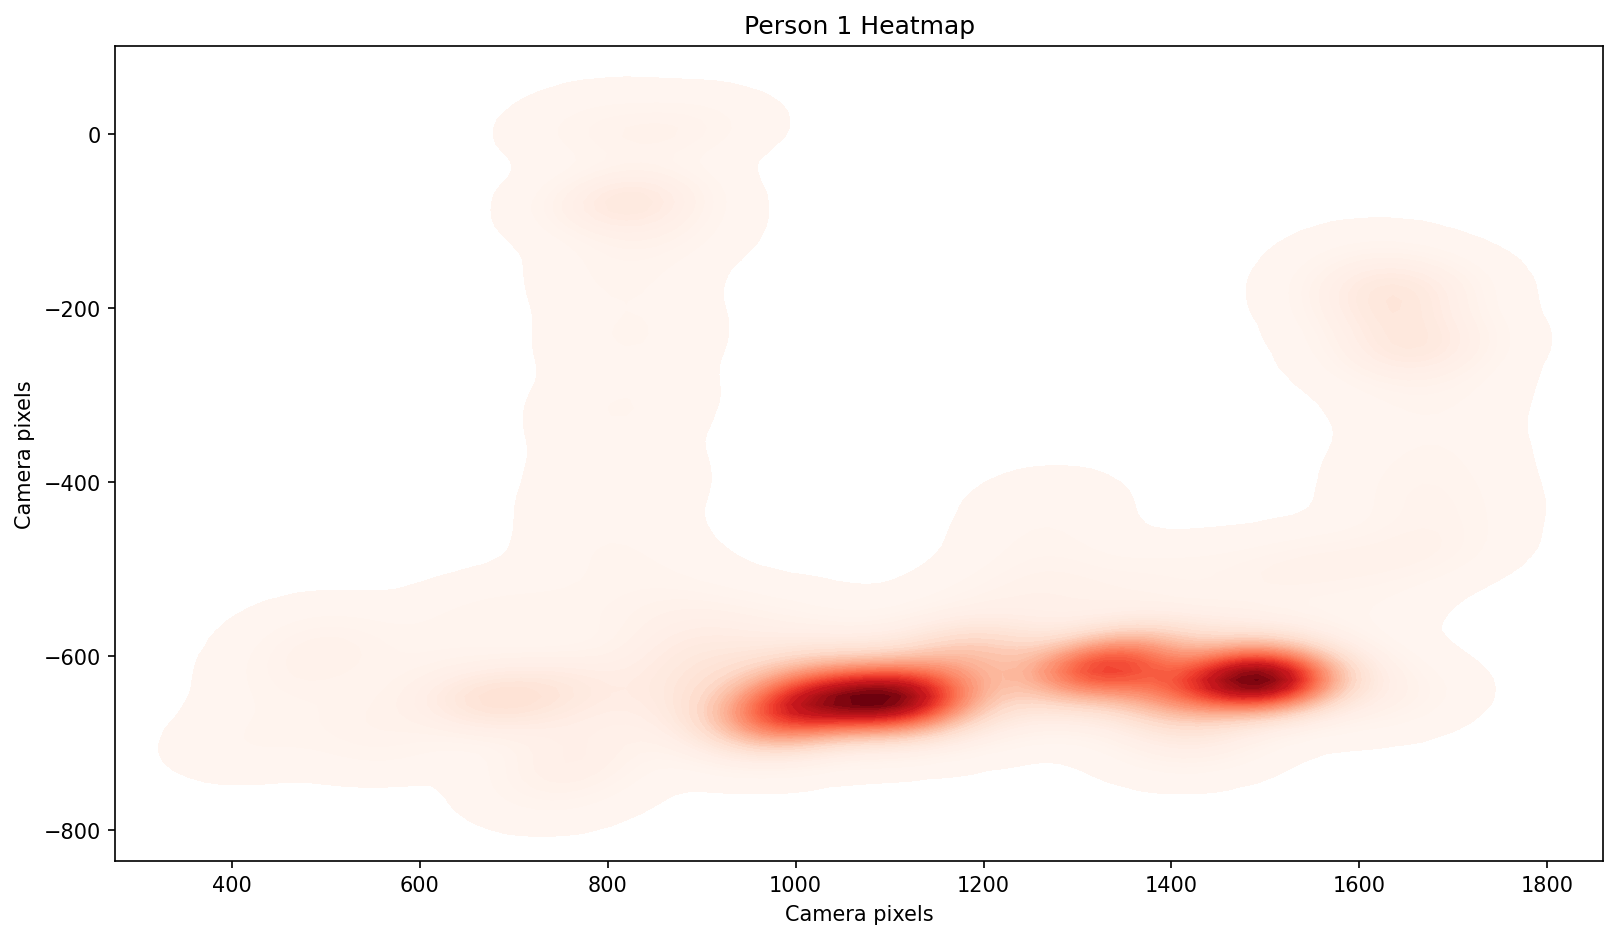

In [17]:
plt.rcParams["figure.figsize"] = (12.8,7.2)
plt.rcParams["figure.dpi"] = (150)

# call the kernel density estimator function
ax = sns.kdeplot(x=person_1["x"], y=-person_1["y"], bw_method = 'scott', cmap="Reds", n_levels = 50, shade=True, thresh=0.001, gridsize=100)
ax.set(title="Person 1 Heatmap")
ax.set_xlabel("Camera pixels")
ax.set_ylabel("Camera pixels")

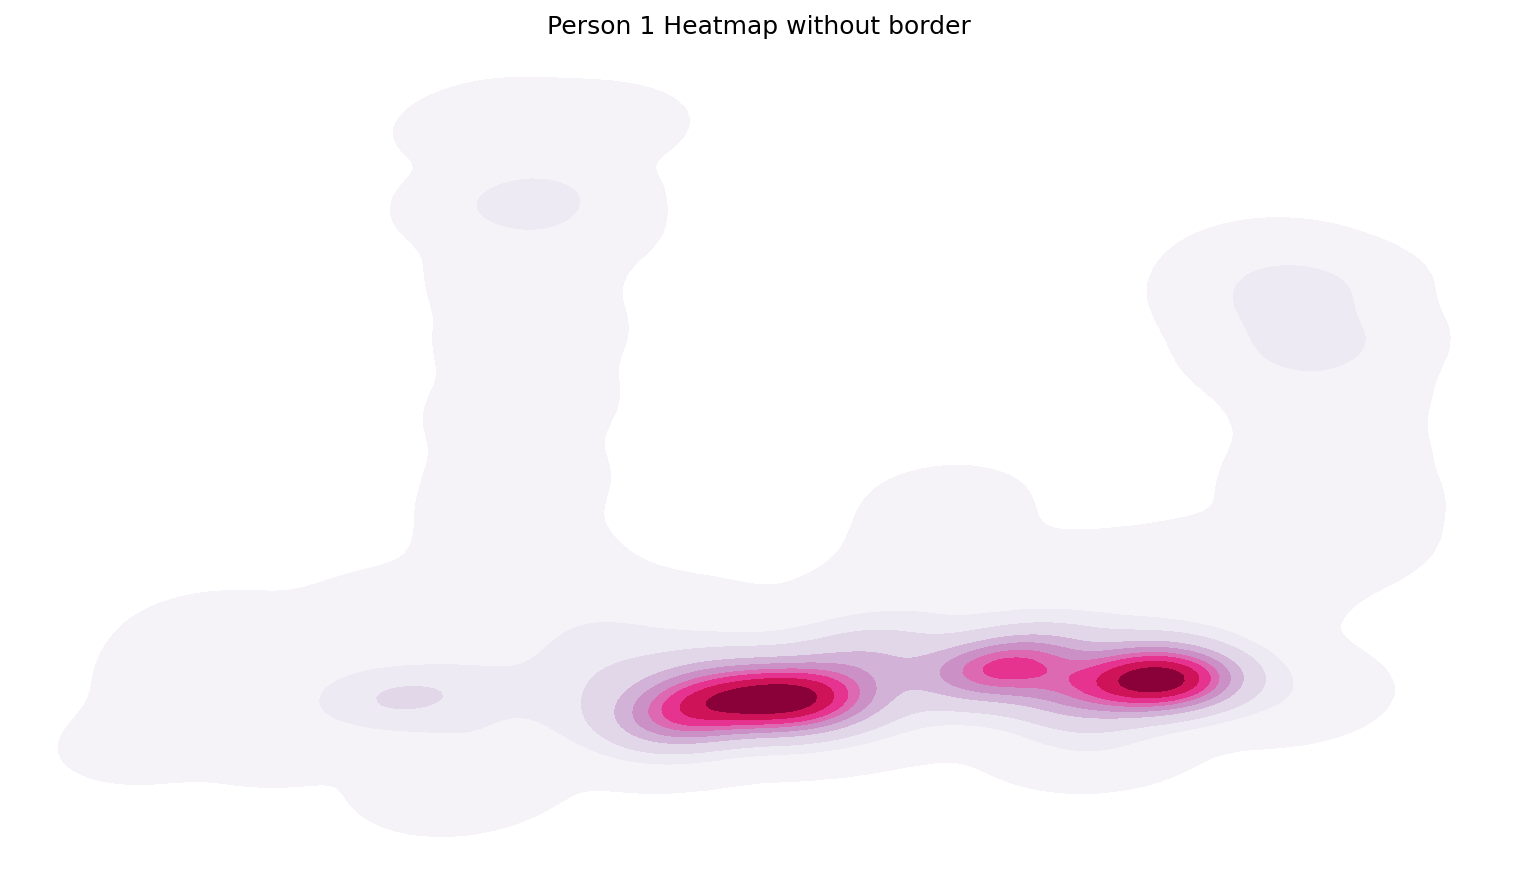

In [18]:
plt.title("Person 1 Heatmap without border")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

plt.box(False)


img = sns.kdeplot(x=person_1["x"], y=850-person_1["y"], cmap="PuRd", shade=True, thresh=0.001)

In [ ]:
plt.title("Person 2 Heatmap without border")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

plt.box(False)

img = sns.kdeplot(x=person_2["x"], y=850-person_2["y"], cmap="PuRd", shade=True, thresh=0.001)

In [ ]:
#Image multiplication

#Load images
img_hub = asarray(Image.open("..\data\huboo_hub.png"))
img_heat = asarray(Image.open("..\data\combined_heatmap_noborder.png"))[:,:,:3]

#Resize img_heat
img_heat = cv2.resize(img_heat, dsize=(2560,1250), interpolation=cv2.INTER_CUBIC)

plt.rcParams["figure.figsize"] = (12.8,7.2)
plt.rcParams["figure.dpi"] = (150)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False) # labels along the bottom edge are off

#Image multiplication
plt.imshow(cv2.addWeighted(img_hub, 1, np.multiply((255 - img_heat), np.array([5,100,0])).astype('uint8'), 2, 0))